# Proyek Analisis Data: Bike Sharing Dataset - Day
- **Nama:** Aisyah Nuraini
- **Email:** aisyahnuraini047@gmail.com
- **ID Dicoding:** aisyahaini

## Menentukan Pertanyaan Bisnis

- 1. Apakah kondisi cuaca dan hari kerja dapat memengaruhi jumlah sepeda yang dipinjam?
- 2. Bagaimana hubungan suhu dan kelembapan dengan jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

Import library yang digunakan

In [67]:
#import library yang digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

**Data Wrangling** digunakan untuk mengumpulkan data yang dibutuhkan untuk menjawab pertanyaan analisis yang telah dibuat sebelumnya.

### Gathering Data

**Gathering data** digunakan utuk mengumpulkan data

In [68]:
#membaca file csv dan menampilkan 10 teratas
df = pd.read_csv("https://raw.githubusercontent.com/aisyahaini/dicoding_project/refs/heads/main/data%20science/Proyek%20akhir%20dicoding%20bike%20sharing%20dataset/day.csv")
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Dataset Bike Sharing (Day) memiliki 16 Kolom
- Pada gathering data menggunakan fungsi dari Pandas yaitu pd.read_csv yang berguna untuk membaca file CSV yang berisi data Bike Sharing (Day)

### Assessing Data

**Assessing Data** digunakan untuk mengindentifikasi masalah yang terdapat dalam data dan memastikan data berkualitas.

In [69]:
# Untuk mengetahui info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [70]:
#untuk mengecek jumlah data null
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [71]:
# Untuk mengecek data yang duplikat
df.duplicated().sum()

0

<Axes: >

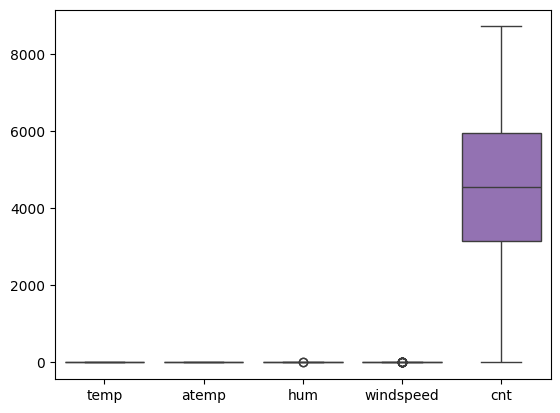

In [72]:
# Untuk menampilkan box plot yang menunjukkan outlier data
sns.boxplot(data=df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])

In [73]:
# Perhitungan IQR untuk setiap kolom
columns_to_check = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
Q1 = df[columns_to_check].quantile(0.25)  # Kuartil pertama
Q3 = df[columns_to_check].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1                             # Rentang antar kuartil
lower_bound = Q1 - 1.5 * IQR              # Batas bawah
upper_bound = Q3 + 1.5 * IQR              # Batas atas

# Menampilkan jumlah outlier per kolom
for col in columns_to_check:
    outliers = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])].index
    print(f"Jumlah outlier pada kolom '{col}': {len(outliers)}")

Jumlah outlier pada kolom 'temp': 0
Jumlah outlier pada kolom 'atemp': 0
Jumlah outlier pada kolom 'hum': 2
Jumlah outlier pada kolom 'windspeed': 13
Jumlah outlier pada kolom 'cnt': 0


**Insight:**
- Assessing data bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

- Dari dataframe yang digunakan terdapat 731 data dengan 16 kolom

- Tidak ada data yang kosong atau missing value

- Tidak ada data yang duplikat

- Terdapat outlier data pada kolom 'hum' dan 'windspeed'

### Cleaning Data

**Cleaning Data** digunakan untuk membersihkan data agar siap untuk dilakukan proses selanjutnya.

In [74]:
# Menghapus kolom instant yang berisi urutan data, dihapus karena tidak diperlukan dalam analisis selanjutnya
df = df.drop(columns = {'instant'})
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [75]:
# Mengganti outlier dengan mean
for col in columns_to_check:
    mean = df[col].mean()
    df[col] = df[col].apply(lambda x: mean if x < lower_bound[col] or x > upper_bound[col] else x)

print("Dataset setelah mengganti outlier dengan mean:")
print(df.describe())


Dataset setelah mengganti outlier dengan mean:
           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     1.395349    0.495385    0.474354    0.629355    0.186465   
std      0.54489

In [76]:
# Menyimpan dataset ke dalam file CSV digunakan untuk pengembangan aplikasi Streamlit
output_file = "dataset_cleaned.csv"
df.to_csv(output_file, index=False)

print(f"Dataset telah disimpan ke dalam file: {output_file}")


Dataset telah disimpan ke dalam file: dataset_cleaned.csv


**Insight:**
1. Menghapus kolom instant dikarenakan tidak digunakan
2. Mengganti data yang outlier dengan mean dari data

## Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawab pertanyaan analisis.

In [77]:
# Menampilkan data 5 terakhir
df.tail(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Menampilkan jumlah peminjaman sepeda berdasarkan cuaca yang terjadi

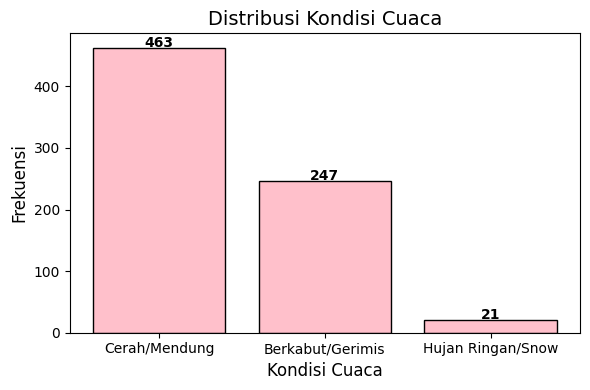

In [78]:
# Definisikan peta kondisi cuaca
weather_labels = {
    1: "Cerah/Mendung",
    2: "Berkabut/Gerimis",
    3: "Hujan Ringan/Snow"
}

# Tambahkan label kondisi cuaca ke dataframe
df['weather_label'] = df['weathersit'].map(weather_labels)

# Hitung distribusi kondisi cuaca
weather_distribution = df['weather_label'].value_counts().reset_index()
weather_distribution.columns = ['Kondisi Cuaca', 'Frekuensi']

# Buat bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(weather_distribution['Kondisi Cuaca'], weather_distribution['Frekuensi'], color='pink', edgecolor='black')

# Tambahkan angka di atas setiap bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        str(bar.get_height()),
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# Tambahkan judul dan label sumbu
plt.title("Distribusi Kondisi Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

Menampilkan data rata-rata jumlah peminjaman sepeda berdasarkan hari kerja atau tidak

<ipython-input-79-a146f7b0c50f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_analysis, x='Working Day', y='Rata-rata Peminjaman', palette='Blues_d')


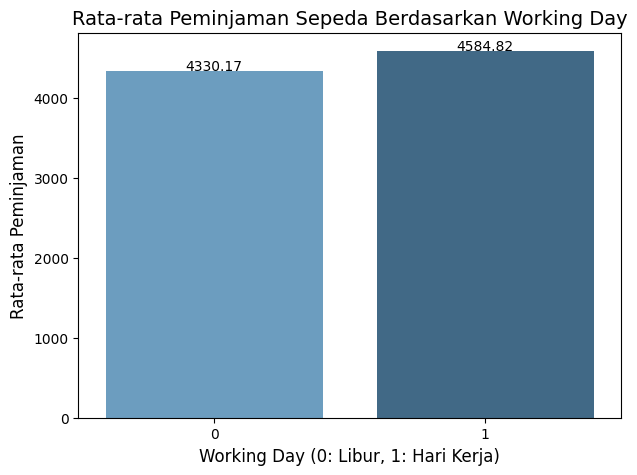

In [79]:
# Hitung rata-rata peminjaman sepeda berdasarkan workingday
workingday_analysis = df.groupby('workingday')['cnt'].mean().reset_index()
workingday_analysis.columns = ['Working Day', 'Rata-rata Peminjaman']

# Visualisasi rata-rata peminjaman berdasarkan Working Day
plt.figure(figsize=(7, 5))
sns.barplot(data=workingday_analysis, x='Working Day', y='Rata-rata Peminjaman', palette='Blues_d')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Working Day', fontsize=14)
plt.xlabel('Working Day (0: Libur, 1: Hari Kerja)', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
for index, row in workingday_analysis.iterrows():
    plt.text(index, row['Rata-rata Peminjaman'] + 10, round(row['Rata-rata Peminjaman'], 2), ha='center', fontsize=10)
plt.show()

Menampilkan jumlah peminjaman sepeda berdasarkan hari

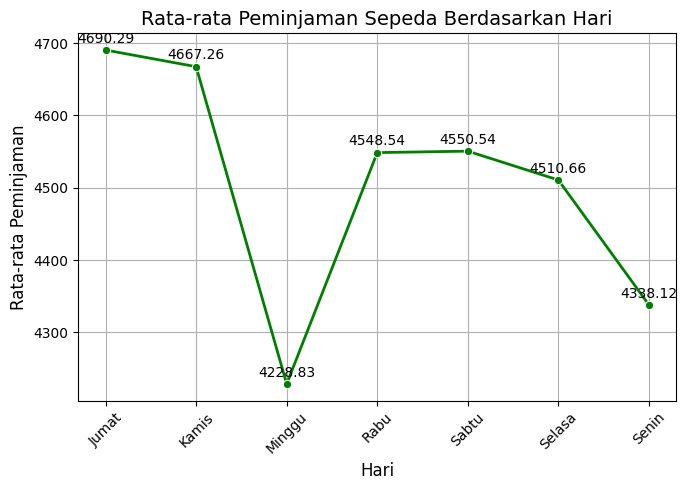

In [83]:
# Mapping untuk kolom weekday
weekday_labels = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}

# Membuat kolom baru
df['weekday_labels'] = df['weekday'].map(weekday_labels)

# Hitung rata-rata peminjaman sepeda berdasarkan weekday_labels
weekday_analysis = df.groupby('weekday_labels')['cnt'].mean().reset_index()
weekday_analysis.columns = ['Hari', 'Rata-rata Peminjaman']

# Visualisasi rata-rata peminjaman berdasarkan Weekday dalam Line Chart
plt.figure(figsize=(7, 5))
sns.lineplot(data=weekday_analysis, x='Hari', y='Rata-rata Peminjaman', marker='o', color='green', linewidth=2)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Hari', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan angka di titik data
for index, row in weekday_analysis.iterrows():
    plt.text(index, row['Rata-rata Peminjaman'] + 10, round(row['Rata-rata Peminjaman'], 2), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Menampilkan scatter plot yang menunjukkan hubungan antara temp, hum, dan windspeed dalam jumlah peminjaman sepeda

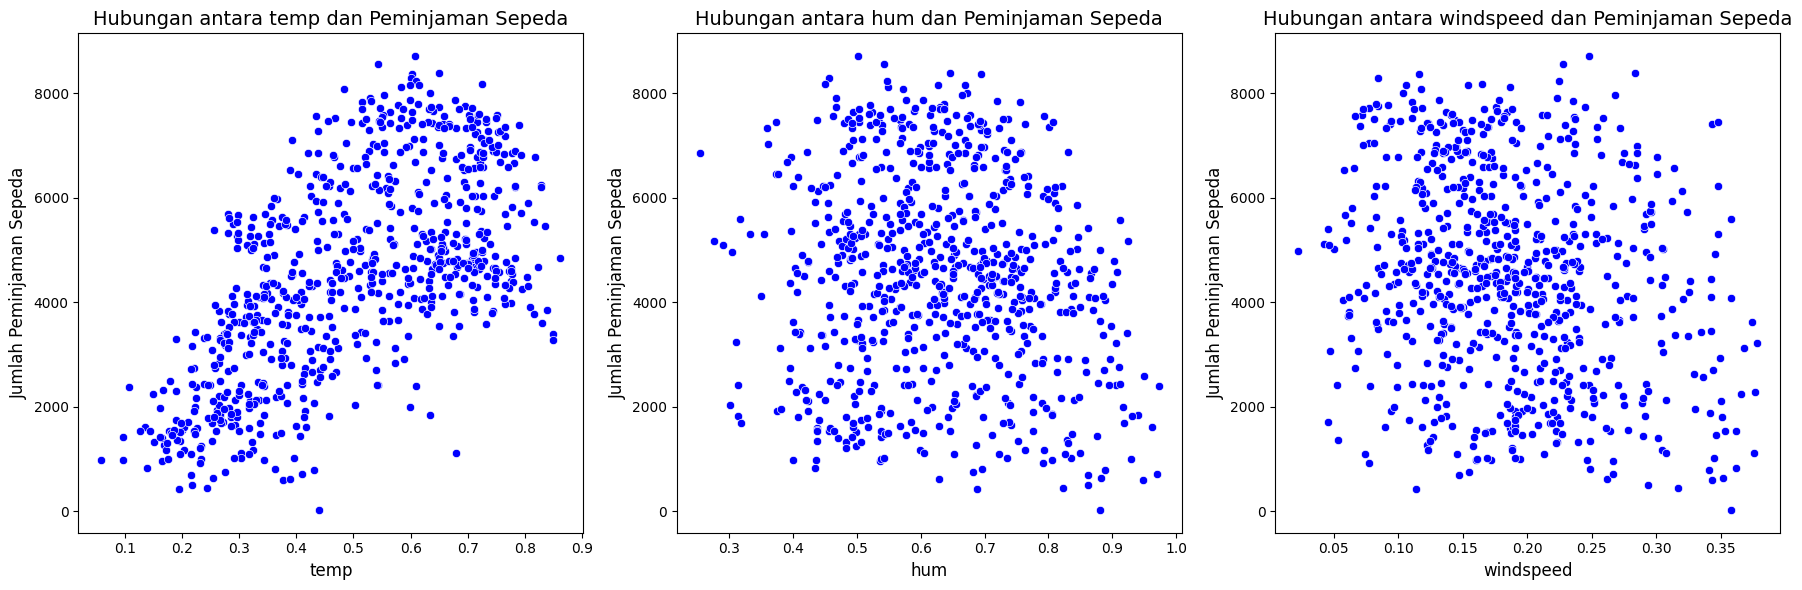

In [84]:
# Analisis hubungan antara temp, hum, windspeed, dan peminjaman sepeda
variables = ['temp', 'hum', 'windspeed']

plt.figure(figsize=(18, 6))

# Plot untuk masing-masing variabel
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=var, y='cnt', color='blue')
    plt.title(f'Hubungan antara {var} dan Peminjaman Sepeda', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Jumlah Peminjaman Sepeda', fontsize=12)

plt.tight_layout()
plt.show()

Menampilkan jumlah peminjaman sepeda berdasarkan orang terdaftar sebagai member dan tidak sebagai member

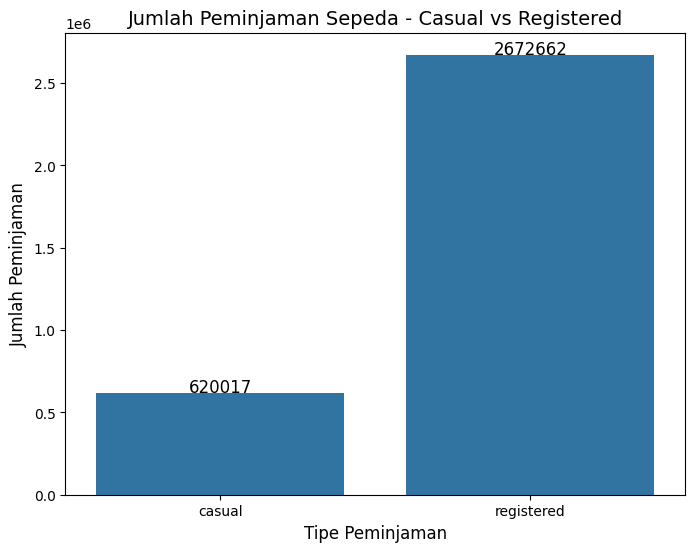

In [85]:
# Hitung jumlah peminjaman sepeda untuk kolom casual dan registered
df_sum = df[['casual', 'registered']].sum().reset_index()
df_sum.columns = ['Tipe Peminjaman', 'Jumlah Peminjaman']

# Visualisasi menggunakan bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipe Peminjaman', y='Jumlah Peminjaman', data=df_sum)

# Menambahkan angka pada setiap bar
for i, value in enumerate(df_sum['Jumlah Peminjaman']):
    plt.text(i, value + 50, f'{value}', ha='center', fontsize=12, color='black')

plt.title('Jumlah Peminjaman Sepeda - Casual vs Registered', fontsize=14)
plt.xlabel('Tipe Peminjaman', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)

plt.show()

**Insight:**
1. Jumlah peminjaman sepeda terbanyak pada cuaca cerah/mendung, kemudian untuk tersedikit jumlahnya pada cuaca hujan ringan/snow
2. Untuk jumlah rata-rata peminjaman sepeda terbanyak pada hari kerja
3. Peminjaman sepeda terbanyak dilakukan pada hari Jumat, kemudian untuk jumlah tersedikit pada hari Minggu
4. Dalam hubungan antara temp, hum, dan windspeed pada jumlah peminjaman sepeda menunjukkan bahwa:
	- Semakin suhu meningkat, maka jumlah peminjaman sepeda akan meningkat dan pada suhu tertinggi kan mengalami penurunan jumlah peminjaman sepeda
	- Peminjaman sepeda akan  meningkat jumlahnya pada kelembapan yang sedang
	- Dalam pengaruh kecepatan angin, jumlah peminjaman sepeda tidak terlalu berpengaruh pada kecepatan angin berapa pun
5. Jumlah peminjaman sepeda terbanyak pada orang yang telah terdaftar menjadi member dibandingkan dengan orang casual yang tidak memiliki member

## Visualization & Explanatory Analysis

### 1. Apakah kondisi cuaca dan hari kerja dapat memengaruhi jumlah sepeda yang dipinjam?

#### Persebaran data berdasarkan jumlah kondisi cuaca

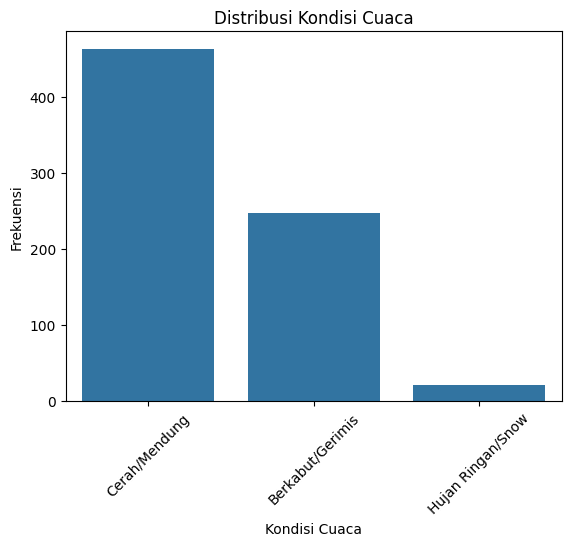

In [86]:
# Buat peta kondisi cuaca
weather_labels = {
    1: "Cerah/Mendung",
    2: "Berkabut/Gerimis",
    3: "Hujan Ringan/Snow"
}

# Tambahkan label kondisi cuaca ke dataframe
df['weather_label'] = df['weathersit'].map(weather_labels)

# Visualisasi distribusi cuaca
sns.countplot(data=df, x='weather_label', order=weather_labels.values())
plt.title("Distribusi Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Frekuensi")

# Memiringkan teks pada sumbu X
plt.xticks(rotation=45)

plt.show()

#### Persebaran data rata-rata dan median dalam peminjaman sepeda berdasarkan cuaca


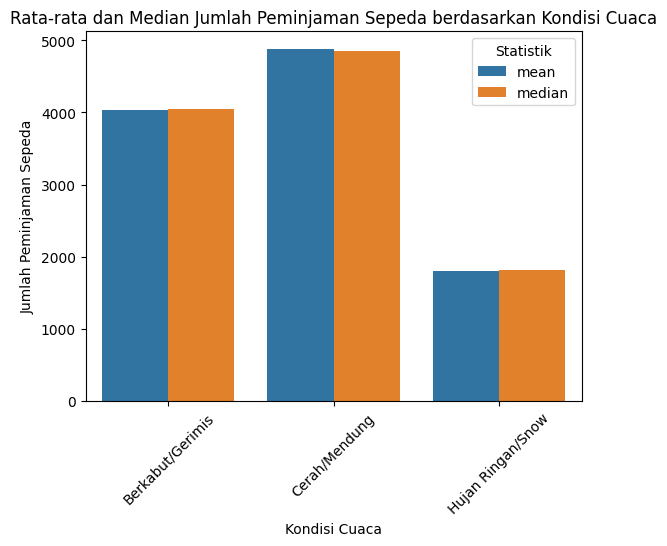

In [87]:
# Buat peta kondisi cuaca
weather_labels = {
    1: "Cerah/Mendung",
    2: "Berkabut/Gerimis",
    3: "Hujan Ringan/Snow"
}

# Tambahkan label kondisi cuaca ke dataframe
df['weather_label'] = df['weathersit'].map(weather_labels)

# Hitung rata-rata dan median jumlah peminjaman sepeda berdasarkan kondisi cuaca
summary_stats = df.groupby('weather_label')['cnt'].agg(['mean', 'median']).reset_index()

# Konversi data ke format panjang untuk visualisasi
summary_melted = pd.melt(summary_stats, id_vars='weather_label', value_vars=['mean', 'median'],
                         var_name='Statistik', value_name='Jumlah Peminjaman')

# Buat bar plot
sns.barplot(data=summary_melted, x='weather_label', y='Jumlah Peminjaman', hue='Statistik')

# Judul dan label
plt.title("Rata-rata dan Median Jumlah Peminjaman Sepeda berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")

# Memiringkan teks pada sumbu X agar lebih rapi
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

Menampilkan data rata-rata jumlah peminjaman sepeda berdasarkan hari kerja atau tidak

<ipython-input-88-a146f7b0c50f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workingday_analysis, x='Working Day', y='Rata-rata Peminjaman', palette='Blues_d')


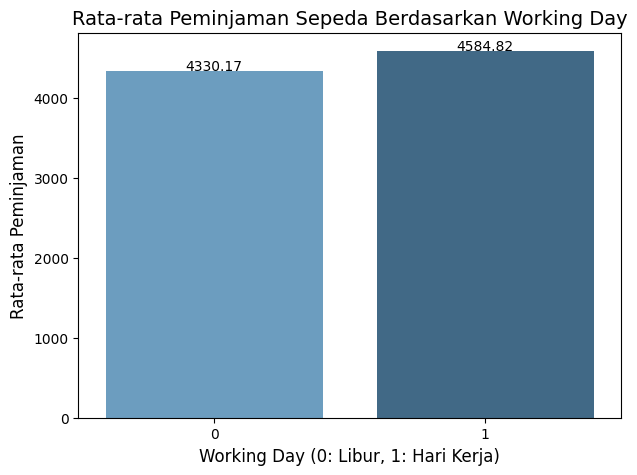

In [88]:
# Hitung rata-rata peminjaman sepeda berdasarkan workingday
workingday_analysis = df.groupby('workingday')['cnt'].mean().reset_index()
workingday_analysis.columns = ['Working Day', 'Rata-rata Peminjaman']

# Visualisasi rata-rata peminjaman berdasarkan Working Day
plt.figure(figsize=(7, 5))
sns.barplot(data=workingday_analysis, x='Working Day', y='Rata-rata Peminjaman', palette='Blues_d')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Working Day', fontsize=14)
plt.xlabel('Working Day (0: Libur, 1: Hari Kerja)', fontsize=12)
plt.ylabel('Rata-rata Peminjaman', fontsize=12)
for index, row in workingday_analysis.iterrows():
    plt.text(index, row['Rata-rata Peminjaman'] + 10, round(row['Rata-rata Peminjaman'], 2), ha='center', fontsize=10)
plt.show()

###2. Bagaimana hubungan suhu dan kelembapan dengan jumlah peminjaman sepeda?

Hubungan antara suhu dan kelembapan dengan jumlah peminjaman sepeda

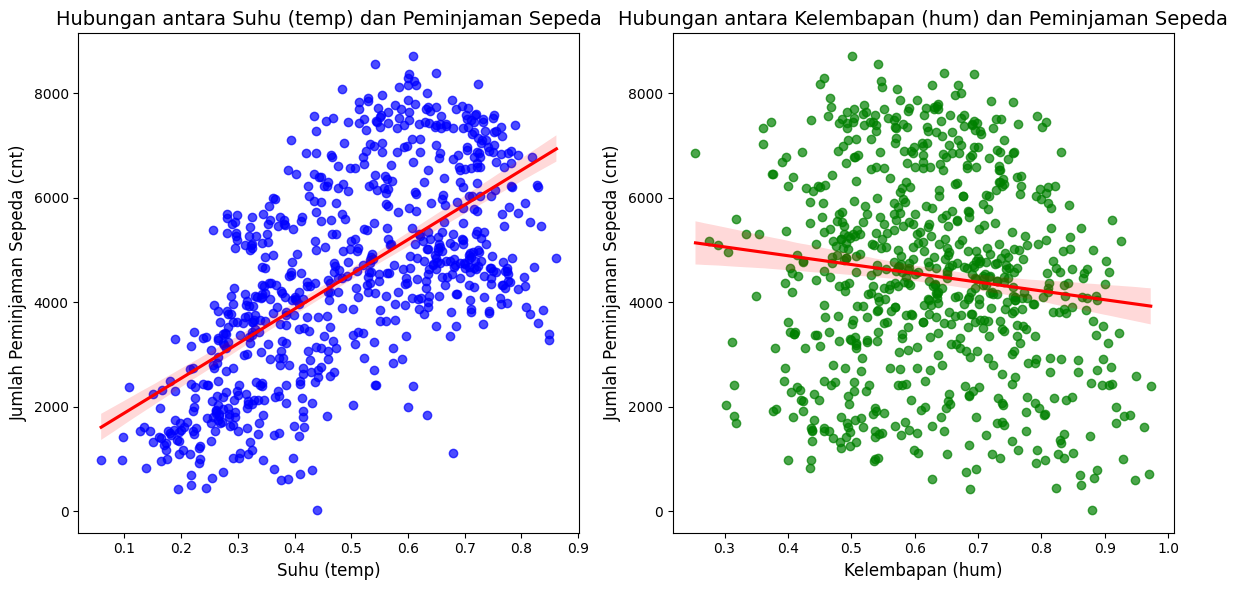

In [95]:
# Ukuran figure
plt.figure(figsize=(12, 6))

# Scatter plot hubungan suhu dengan jumlah peminjaman sepeda
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='temp', y='cnt', color='blue', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.7})
plt.title('Hubungan antara Suhu (temp) dan Peminjaman Sepeda', fontsize=14)
plt.xlabel('Suhu (temp)', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)', fontsize=12)

# Scatter plot hubungan kelembapan dengan jumlah peminjaman sepeda
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='hum', y='cnt', color='green', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.7})
plt.title('Hubungan antara Kelembapan (hum) dan Peminjaman Sepeda', fontsize=14)
plt.xlabel('Kelembapan (hum)', fontsize=12)
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)', fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
1. Jumlah peminjaman sepeda terbanyak pada cuaca cerah/mendung, kemudian untuk tersedikit jumlahnya pada cuaca hujan ringan/snow
2. Untuk jumlah rata-rata peminjaman sepeda terbanyak pada hari kerja
3. Dalam hubungan antara temp, hum, dan windspeed pada jumlah peminjaman sepeda menunjukkan bahwa:
	- semakin suhu meningkat, maka jumlah peminjaman sepeda akan meningkat dan pada suhu tertinggi kan mengalami penurunan jumlah peminjaman sepeda
	- Peminjaman sepeda akan berdasarkan kelembapan tidak berpengaruh signifikan baik pada kelembapan tinggi atau rendah

## Conclusion

### **Conclusion**

1. **Pengaruh kondisi cuaca dan hari kerja terhadap jumlah peminjaman sepeda**:
   - Jumlah peminjaman sepeda **terbanyak** terjadi pada cuaca **cerah atau mendung**, yang menunjukkan bahwa kondisi cuaca yang nyaman dan tidak ekstrem mendukung aktivitas bersepeda.
   - Sebaliknya, jumlah peminjaman sepeda **tersedikit** terjadi pada cuaca **hujan ringan atau salju**, yang dapat menunjukkan bahwa kondisi cuaca buruk cenderung mengurangi aktivitas bersepeda.
   - Rata-rata jumlah peminjaman sepeda **lebih tinggi pada hari kerja** dibandingkan dengan akhir pekan. Hal ini mungkin disebabkan oleh penggunaan sepeda sebagai sarana transportasi untuk bekerja atau aktivitas rutin lainnya pada hari kerja.

2. **Hubungan antara Suhu dan Kelembapan dengan jumlah peminjaman sepeda**:
   - Suhu: Peningkatan suhu cenderung meningkatkan jumlah peminjaman sepeda hingga suhu tertentu. Namun, pada suhu yang terlalu tinggi, terjadi penurunan jumlah peminjaman, kemungkinan karena kondisi yang terlalu panas menjadi tidak nyaman untuk bersepeda.
   - Kelembapan: Tingkat kelembapan tidak memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Baik pada kelembapan tinggi maupun rendah, jumlah peminjaman tetap stabil.